In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
path = "../data/M5_full.parquet"

df = pd.read_parquet(path)

In [4]:
df.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,value,date
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
5,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
6,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
7,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,2011-01-29
8,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,2011-01-29
9,HOBBIES_1_010_CA_1_evaluation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29


In [5]:
# Olhando infos básicas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59181090 entries, 0 to 59181089
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   id        category
 1   item_id   category
 2   dept_id   category
 3   cat_id    category
 4   store_id  category
 5   state_id  category
 6   value     int16   
 7   date      object  
dtypes: category(6), int16(1), object(1)
memory usage: 1016.2+ MB


In [6]:
df['date'].min()

'2011-01-29'

In [7]:
df['date'].max()

'2016-05-22'

In [8]:
df.shape

(59181090, 8)

In [9]:
df['item_id'].nunique()

3049

In [20]:
df['item_id'].nunique()

3049

In [11]:
df['dept_id'].unique()

['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1', 'FOODS_2', 'FOODS_3']
Categories (7, object): ['FOODS_1', 'FOODS_2', 'FOODS_3', 'HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2']

In [12]:
df['cat_id'].unique()

['HOBBIES', 'HOUSEHOLD', 'FOODS']
Categories (3, object): ['FOODS', 'HOBBIES', 'HOUSEHOLD']

In [13]:
df['store_id'].unique()

['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
Categories (10, object): ['CA_1', 'CA_2', 'CA_3', 'CA_4', ..., 'TX_3', 'WI_1', 'WI_2', 'WI_3']

In [14]:
df['state_id'].unique()

['CA', 'TX', 'WI']
Categories (3, object): ['CA', 'TX', 'WI']

In [15]:
df['value'].nunique()

419

In [16]:
# Agrupando a base por mês (ela tá por dia)

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['year_month'] = df['date'].dt.to_period('M')

# grouped_df = df.groupby(['item_id', 'year_month']).reset_index()

# grouped_df['year_month'] = grouped_df['year_month'].dt.to_timestamp()

#### Análise categórica


In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [57]:
def plot_cats(cats):
    for cat in cats:
        df_grouped = df.groupby(cat)['value'].sum().reset_index()
        plt.figure(figsize=(10, 5))
        plt.bar(df_grouped[cat], df_grouped['value'])

        plt.title(f'Soma dos Valores por {cat}')
        plt.xlabel(cat)
        plt.ylabel('Soma dos Valores')

        plt.xticks(rotation=45)

        plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

        plt.show()

In [11]:
#Decidi não plotar itens pq tem 3k+
cats = ['dept_id','cat_id','store_id','state_id']

C:\Users\micha\AppData\Local\Temp\ipykernel_6760\3200253073.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_state = df.groupby(cat)['value'].sum().reset_index()


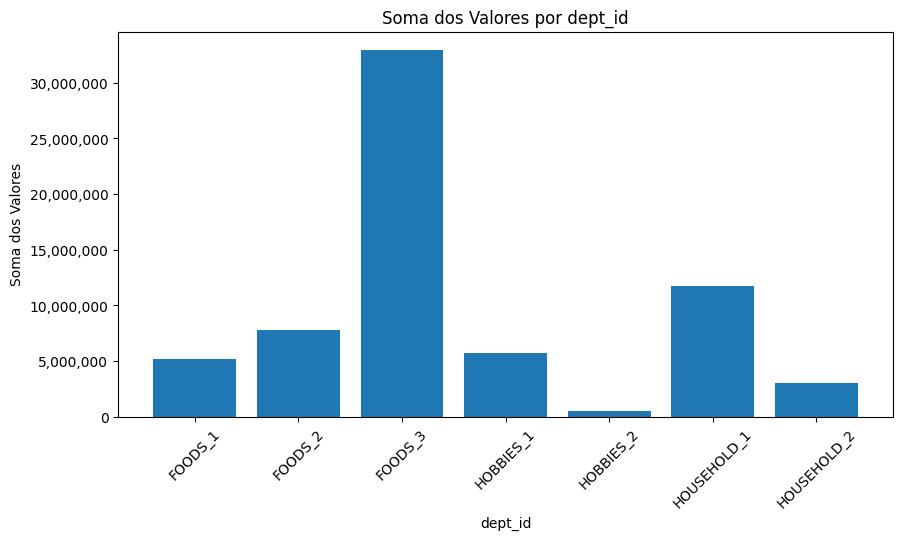

C:\Users\micha\AppData\Local\Temp\ipykernel_6760\3200253073.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_state = df.groupby(cat)['value'].sum().reset_index()


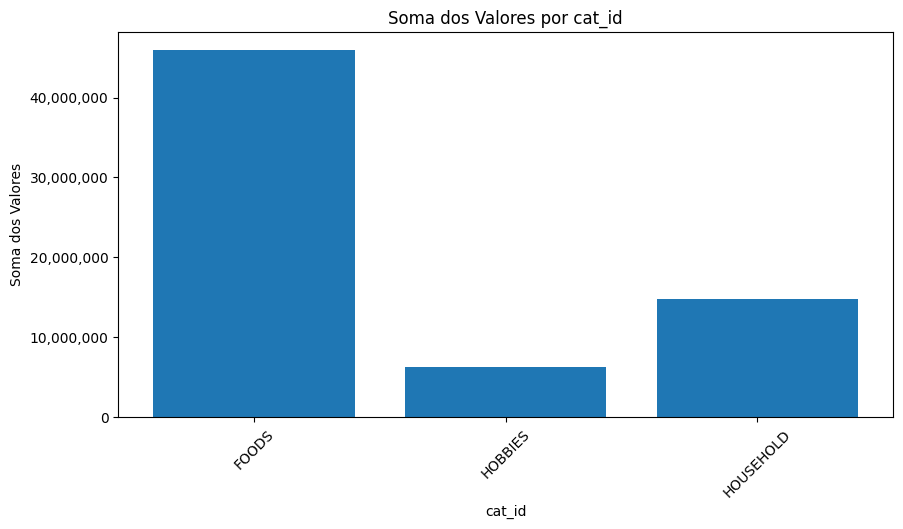

C:\Users\micha\AppData\Local\Temp\ipykernel_6760\3200253073.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_state = df.groupby(cat)['value'].sum().reset_index()


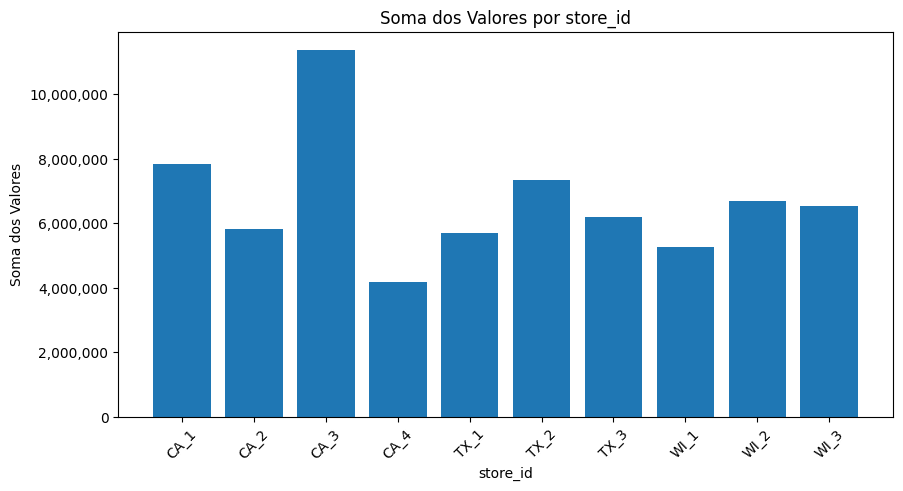

C:\Users\micha\AppData\Local\Temp\ipykernel_6760\3200253073.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_state = df.groupby(cat)['value'].sum().reset_index()


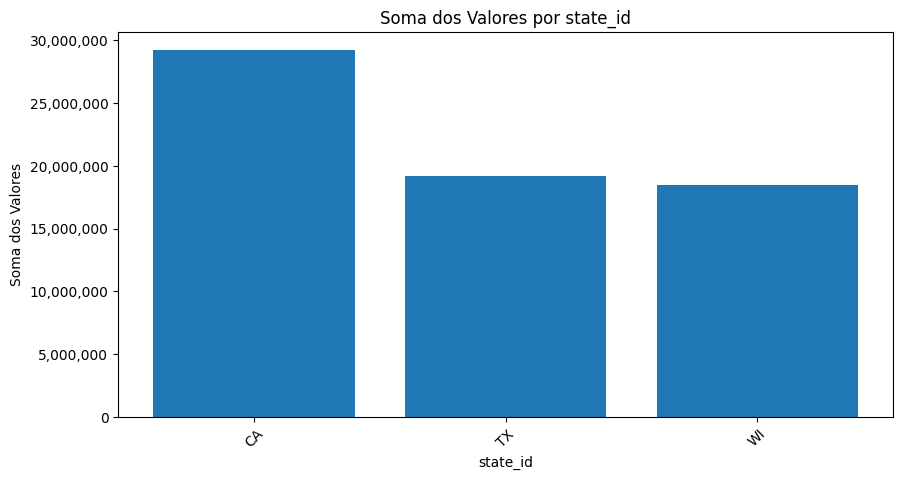

In [63]:
plot_cats(cats)

#### Plotamos as series e percebemos que a grande maioria tem uma trend positiva e um comportamento similar entre as categorias

In [16]:
def plot_series(columns):
    for col in columns:
        df_grouped = df.groupby([col,'year_month'])['value'].sum().reset_index().set_index('year_month')

        cats = list(df[col].unique())
        
        for cat in cats:
            plt.figure(figsize=(10, 6))
            filtered_df = df_grouped[df_grouped[col] == cat]
            filtered_df['value'].plot()
            
            plt.title(f'Vendas pra {col}: {cat}')
            plt.xlabel('Ano')
            plt.ylabel('Total de vendas')
            plt.grid(True)
            plt.show()

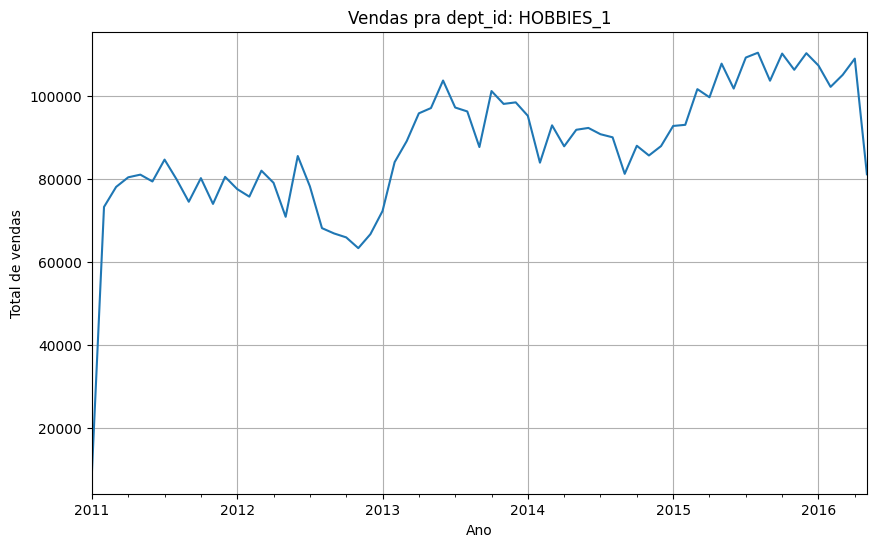

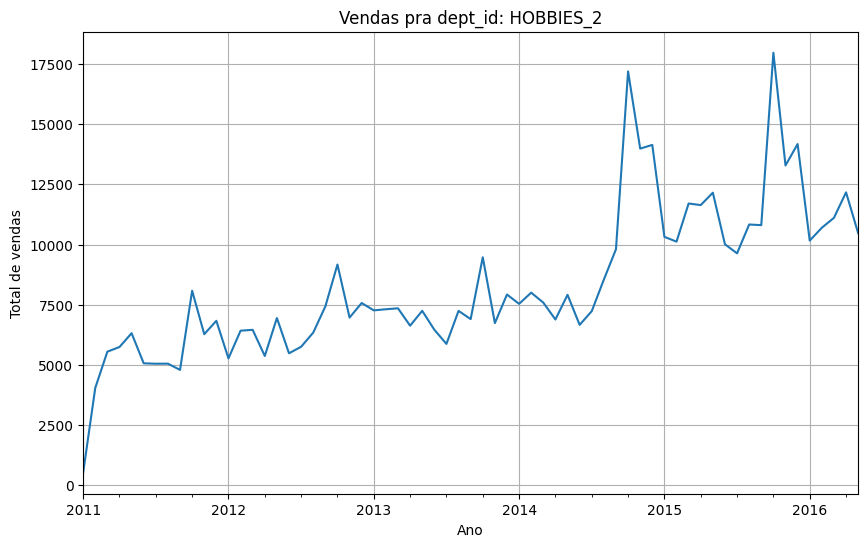

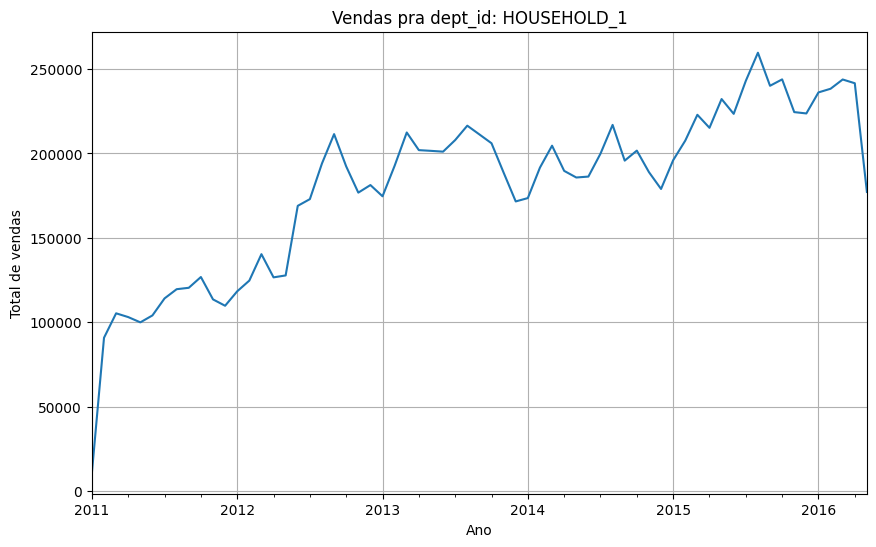

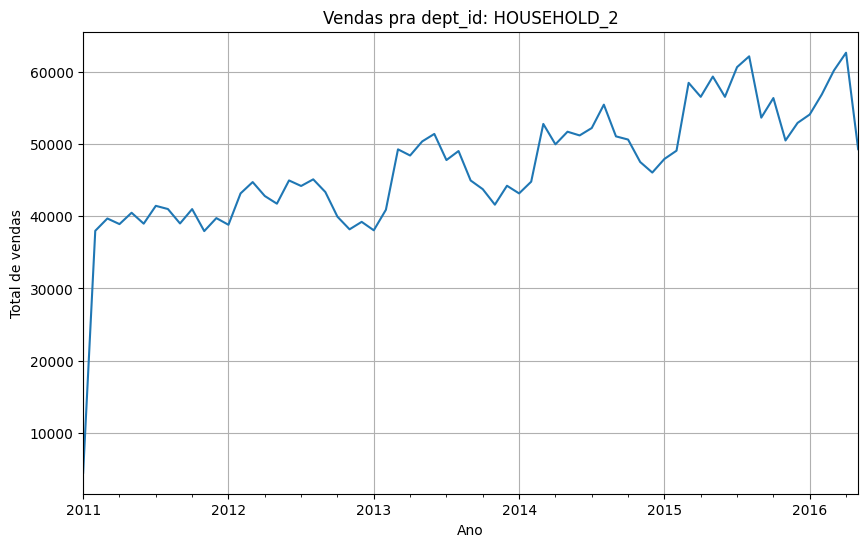

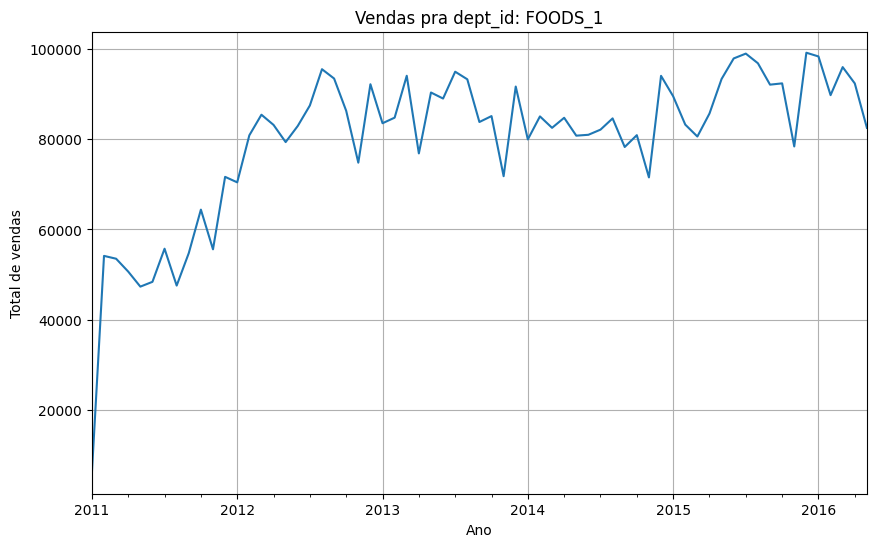

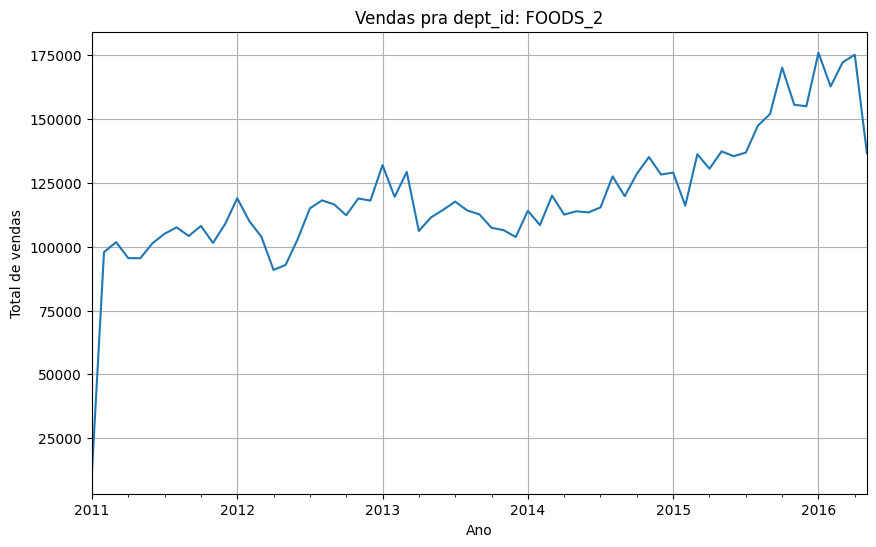

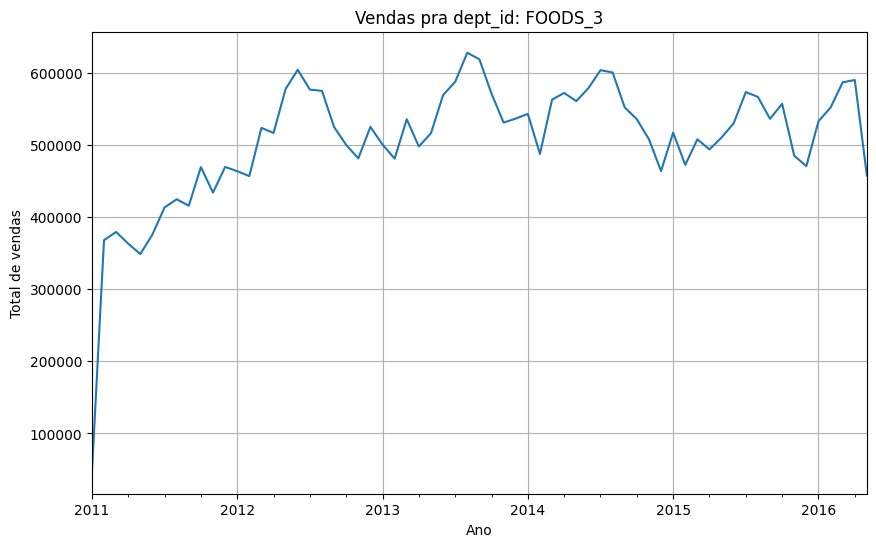

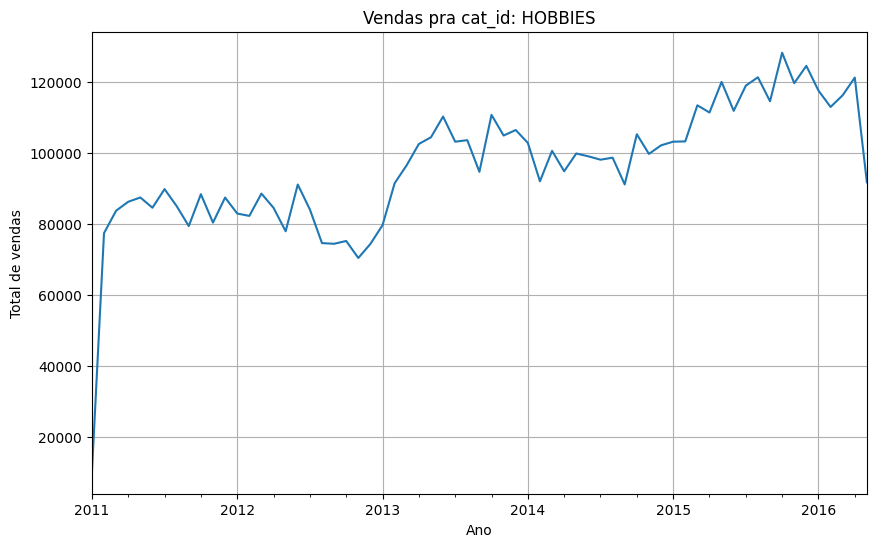

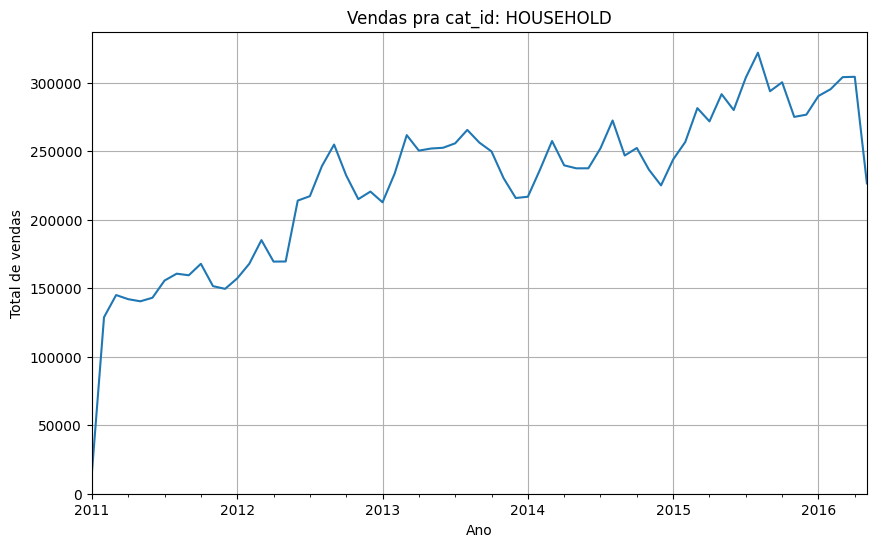

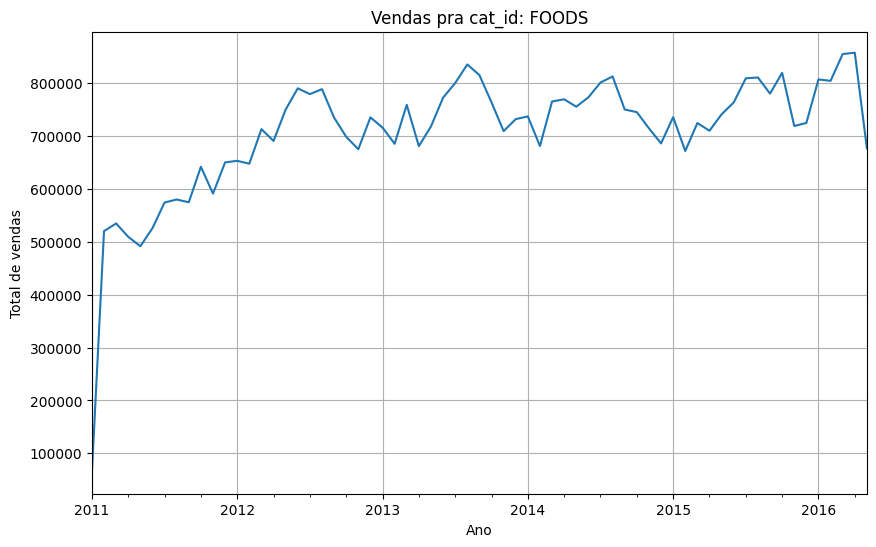

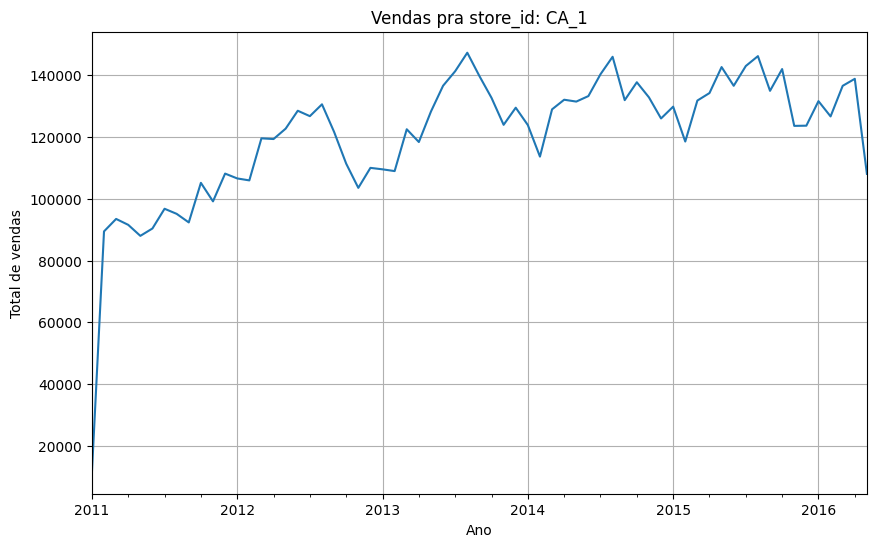

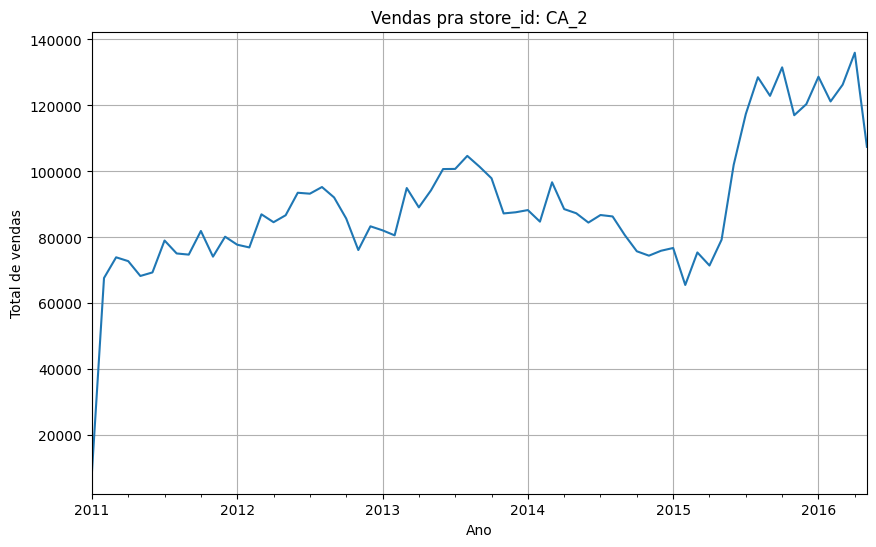

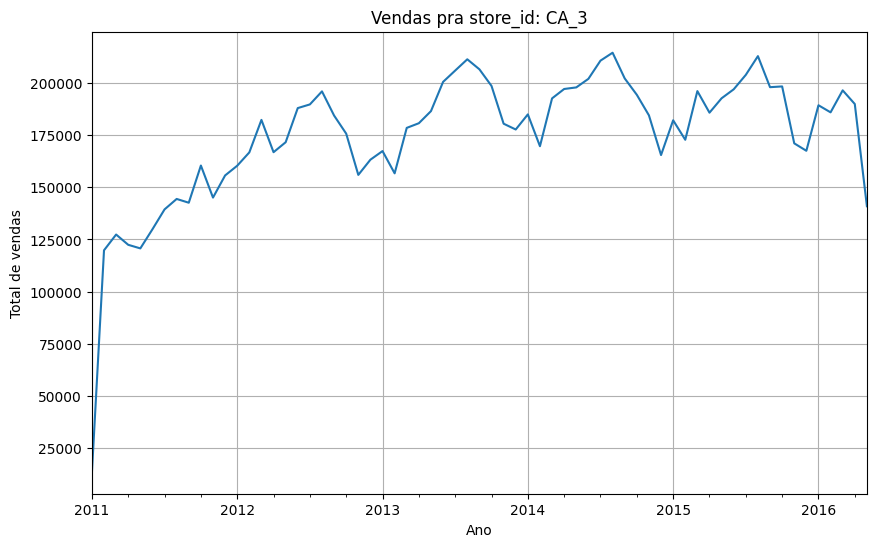

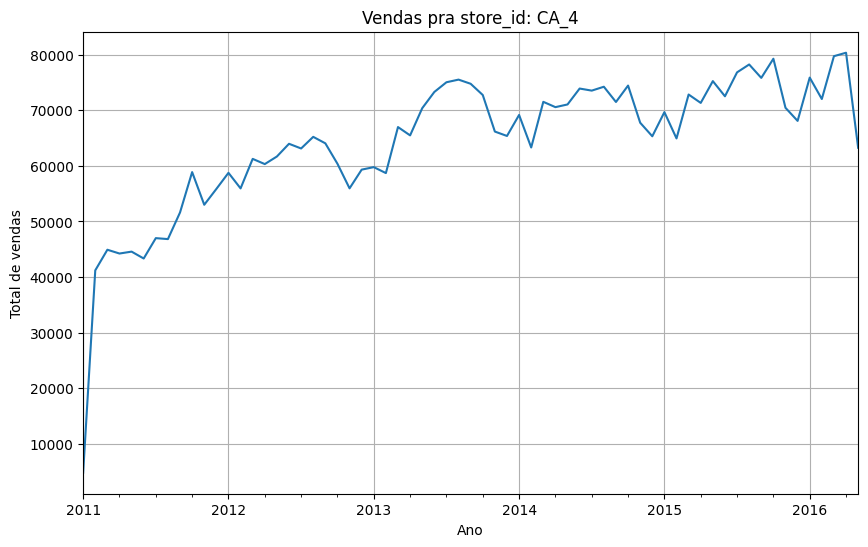

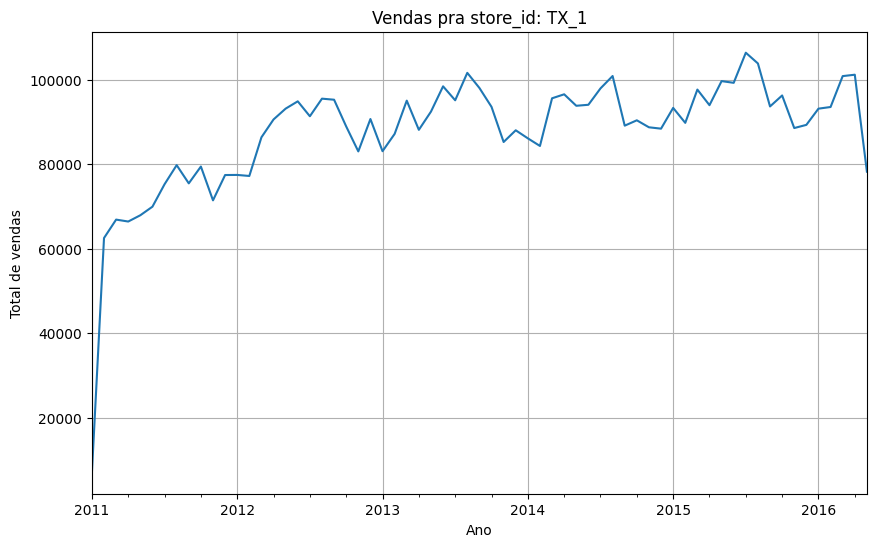

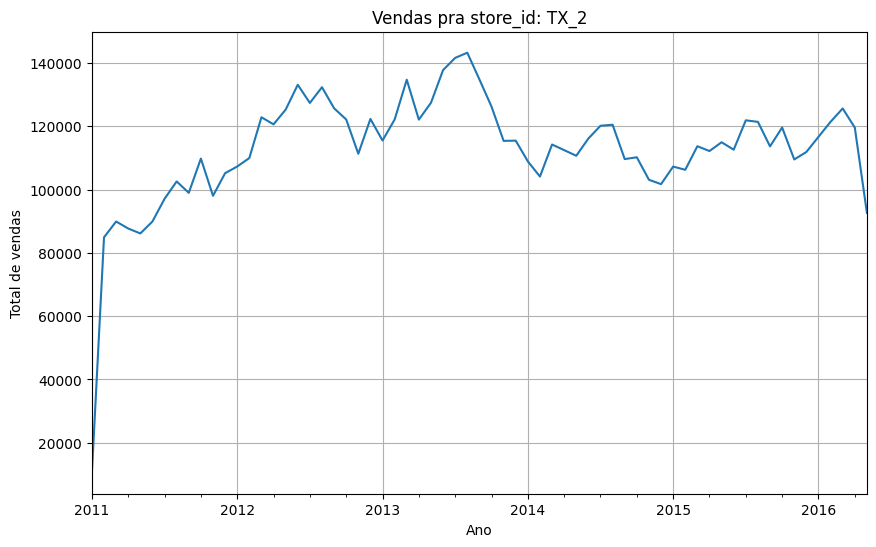

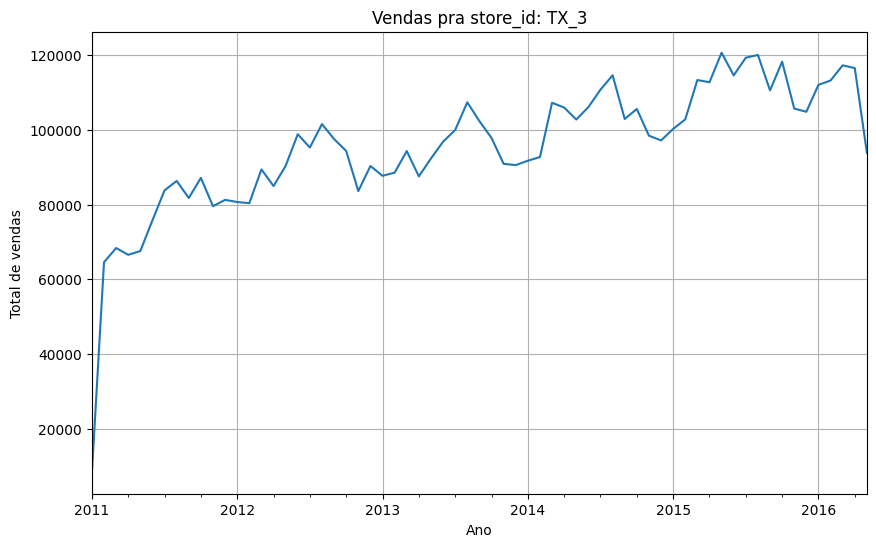

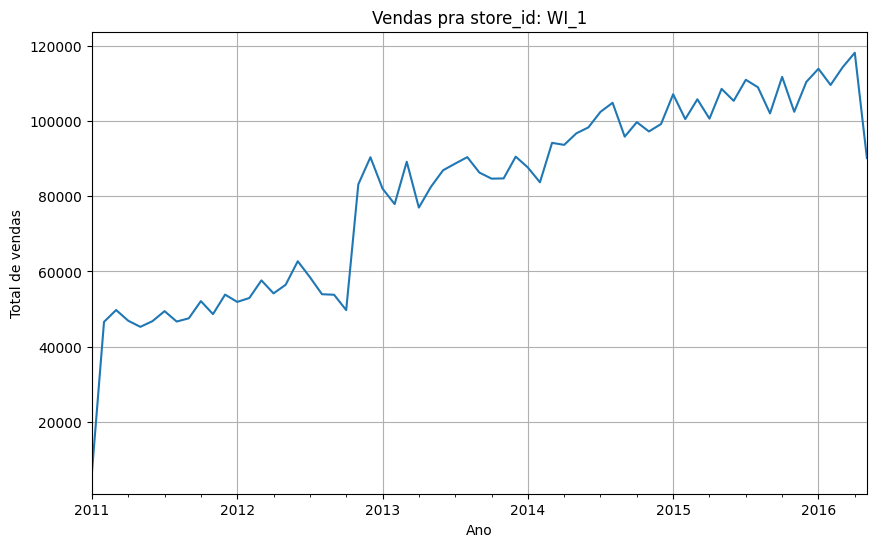

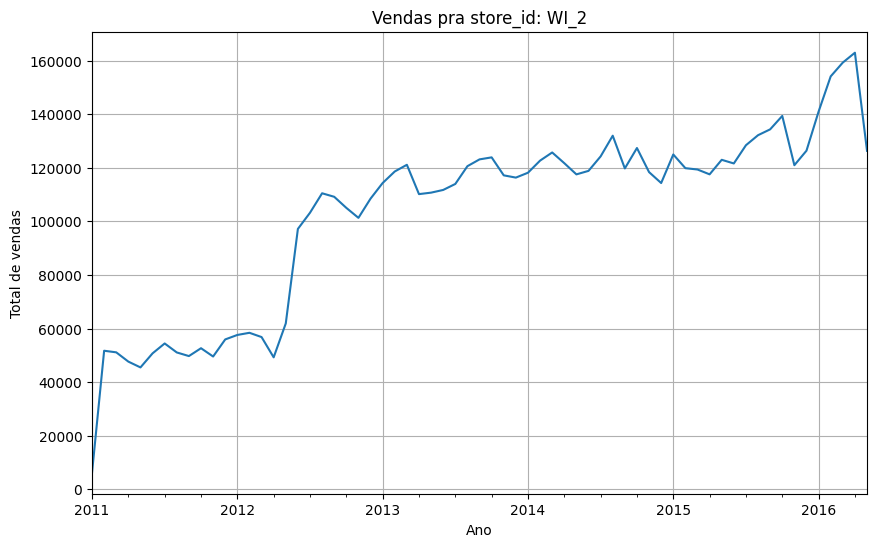

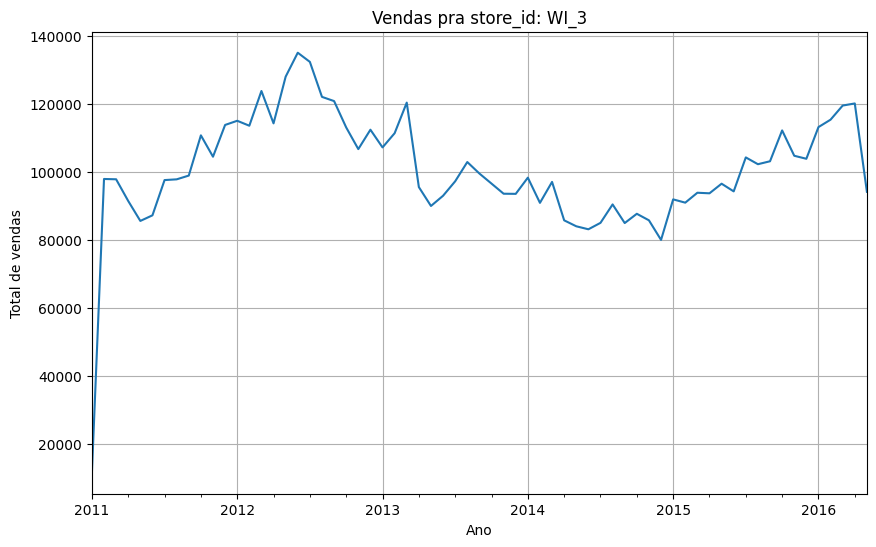

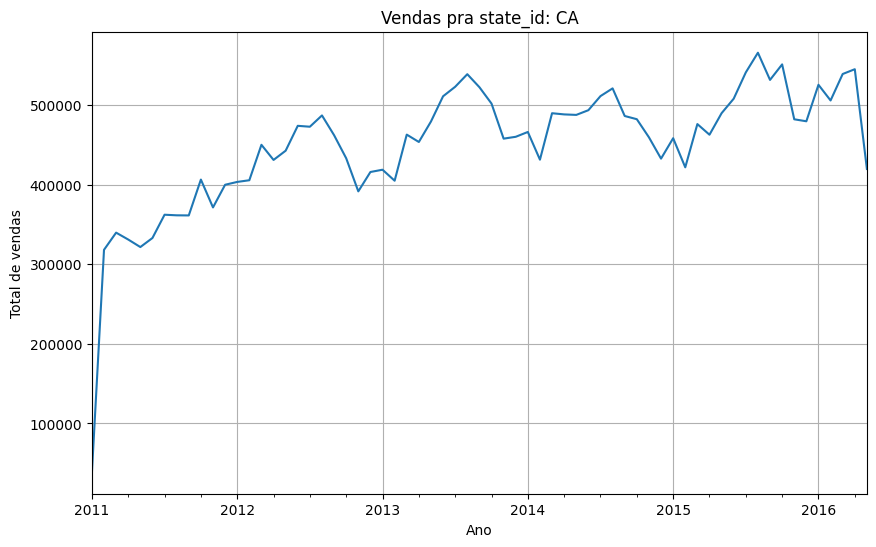

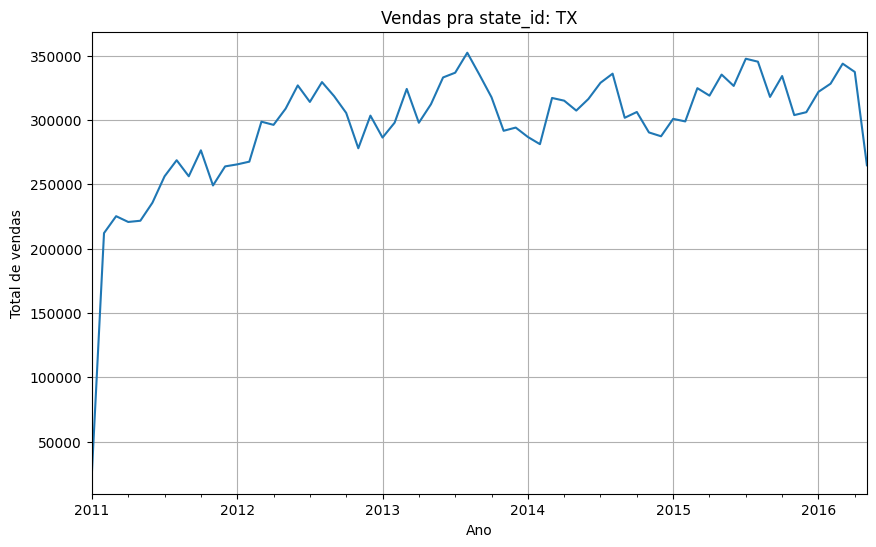

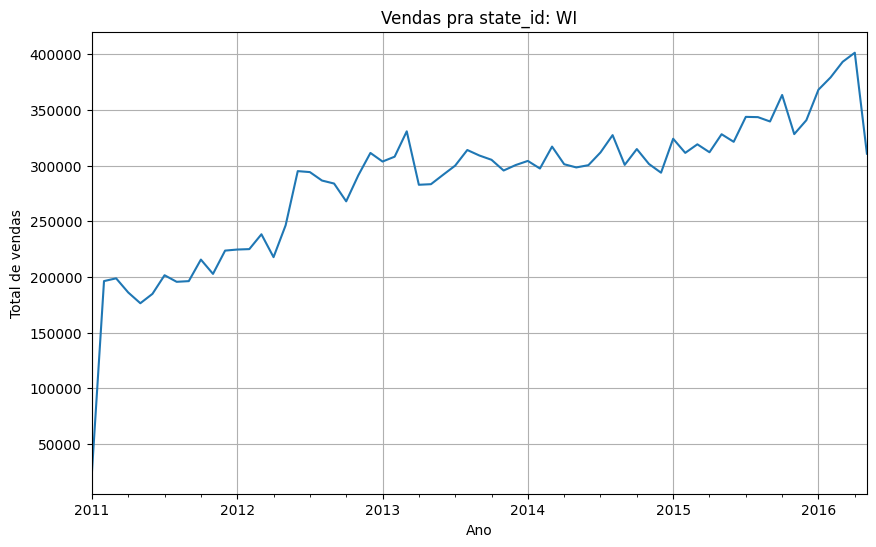

In [17]:
plot_series(cats)

#### Top 10 itens por categoria

In [6]:
df2 = df
df2['date'] = pd.to_datetime(df2['date'])
df2['year_month'] = df2['date'].dt.to_period('M')

grouped_df = df2.groupby(['item_id']).agg({'value': 'sum', 'cat_id' : 'first'}).reset_index()

In [7]:
grouped_df.head()

,item_id,value,cat_id
0,FOODS_1_001,12404,FOODS
1,FOODS_1_002,7465,FOODS
2,FOODS_1_003,13578,FOODS
3,FOODS_1_004,132251,FOODS
4,FOODS_1_005,23419,FOODS


In [27]:
grouped_df = grouped_df.sort_values(by='value', ascending=False)

In [8]:
def get_top_items(grouped_df):
    top_items = grouped_df.groupby('cat_id').apply(lambda x: x.nlargest(10, 'value')).reset_index(drop=True)
    return top_items[['cat_id', 'item_id', 'value']]

top_items = get_top_items(grouped_df)
print(top_items)

       cat_id          item_id    value
0       FOODS      FOODS_3_090  1017916
1       FOODS      FOODS_3_586   932236
2       FOODS      FOODS_3_252   573723
3       FOODS      FOODS_3_555   497881
4       FOODS      FOODS_3_587   402159
5       FOODS      FOODS_3_714   402111
6       FOODS      FOODS_3_694   395937
7       FOODS      FOODS_3_226   368369
8       FOODS      FOODS_3_202   300529
9       FOODS      FOODS_3_120   290132
10    HOBBIES    HOBBIES_1_371   124086
11    HOBBIES    HOBBIES_1_348   107234
12    HOBBIES    HOBBIES_1_268    96490
13    HOBBIES    HOBBIES_1_341    93502
14    HOBBIES    HOBBIES_1_178    91716
15    HOBBIES    HOBBIES_1_370    91144
16    HOBBIES    HOBBIES_1_008    88872
17    HOBBIES    HOBBIES_1_254    88641
18    HOBBIES    HOBBIES_1_015    85637
19    HOBBIES    HOBBIES_1_256    80107
20  HOUSEHOLD  HOUSEHOLD_1_334   174036
21  HOUSEHOLD  HOUSEHOLD_1_459   173054
22  HOUSEHOLD  HOUSEHOLD_1_521   154796
23  HOUSEHOLD  HOUSEHOLD_1_303   150681
